In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
df  = sns.load_dataset('titanic')

In [ ]:
df = df.to_csv('titanic.csv')

In [ ]:
df

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embark_town'] = label_encoder.fit_transform(df['embark_town'])
df['class'] = label_encoder.fit_transform(df['class'])
df['alone'] = label_encoder.fit_transform(df['alone'])

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,woman,False,C,0,yes,0
3,1,1,0,35.0,1,0,53.1000,2,0,woman,False,C,2,yes,0
6,0,1,1,54.0,0,0,51.8625,2,0,man,True,E,2,no,1
10,1,3,0,4.0,1,1,16.7000,2,2,child,False,G,2,yes,0
11,1,1,0,58.0,0,0,26.5500,2,0,woman,False,C,2,yes,1


In [ ]:
X = df[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = df['survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy = accuracy_score(y_test,pred)
confusion_matrix = confusion_matrix(y_test,pred)
classification_report = classification_report(y_test,pred)


NameError: name 'y_test' is not defined

In [ ]:
print(accuracy)


0.6486486486486487


In [ ]:
print(confusion_matrix)


[[10 10]
 [ 3 14]]


In [ ]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.58      0.82      0.68        17

    accuracy                           0.65        37
   macro avg       0.68      0.66      0.64        37
weighted avg       0.68      0.65      0.64        37



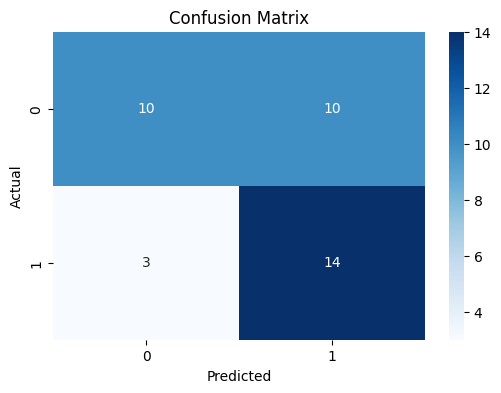

In [ ]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Grid for 'lbfgs' solver
param_grid_lbfgs = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}

grid_lbfgs = GridSearchCV(LogisticRegression(), param_grid_lbfgs, cv=5)
grid_lbfgs.fit(x_train, y_train)

# Grid for 'liblinear' solver
param_grid_liblinear = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

grid_liblinear = GridSearchCV(LogisticRegression(), param_grid_liblinear, cv=5)
grid_liblinear.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [ ]:
print(grid_lbfgs.best_estimator_)

LogisticRegression(C=1)


In [ ]:
print(grid_liblinear.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
model = LogisticRegression(C = 0.01, penalty='l2', solver = 'lbfgs', max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [ ]:
import numpy as np


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)

print("✅ Accuracy:", accuracy)
print("🧾 Confusion Matrix:\n", cm)
print("📄 Classification Report:\n", report)


✅ Accuracy: 0.6486486486486487
🧾 Confusion Matrix:
 [[10 10]
 [ 3 14]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.58      0.82      0.68        17

    accuracy                           0.65        37
   macro avg       0.68      0.66      0.64        37
weighted avg       0.68      0.65      0.64        37

